### Rodar vídeo local

In [ ]:
# importing libraries
import cv2
import numpy as np

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('video.mp4')

# Check if camera opened successfully
if (cap.isOpened() == False):
    print("Error opening video  file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))

    # Display the resulting frame
    cv2.imshow('Frame', frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()


### Rodar vídeo no youtube

In [ ]:
import webbrowser as web

url = 'https://www.youtube.com/watch?v=SfLV8hD7zX4'

web.open_new(url)


Checar links

https://docs.python.org/3/library/webbrowser.html

https://pypi.org/project/youtube-video-play-pause-bot/

https://stackoverflow.com/questions/63599903/how-can-i-play-a-youtube-video-selenium

### Audio and Video

In [ ]:
import cv2
import numpy as np
import os
from ffpyplayer.player import MediaPlayer
from time import sleep
video_path = "video.mp4"


def PlayVideo(video_path):
    video = cv2.VideoCapture(video_path)
    player = MediaPlayer(video_path)

    if (video.isOpened() == False):
        print("Error opening video  file")
        return

    # Read until video is completed
    while(video.isOpened()):
        hasContent, frame = video.read()
        audio_frame, val = player.get_frame()

        if not hasContent:
            print("End of video")
            break

        # Pause video
        if cv2.waitKey(28) & 0xFF == 32:
            while(cv2.waitKey(28) & 0xFF != 32):
                if cv2.waitKey(28) & 0xFF == ord("q"):
                    return
                sleep(0.001)

        # Quit video
        if cv2.waitKey(28) & 0xFF == ord("q"):
            break

        # Display the video image
        frame = cv2.resize(frame, (1280, 720))
        cv2.imshow("Video", frame)

        # Play the video audio
        if val != 'eof' and audio_frame is not None:
            img, t = audio_frame
    video.release()
    cv2.destroyAllWindows()


PlayVideo(video_path)


# Testes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltline
from openpyxl import load_workbook
import openpyxl
import os

path = f'{os.path.dirname(os.path.realpath(__file__))}\Results'

reactions = [
    ('neutral', 0),
    ('happy', 1.744248399976641),
    ('sad', 2.0440329000120983),
    ('fear', 2.373049699992407),
    ('sad', 2.75135879998561),
    ('neutral', 3.3799759999965318),
    ('sad', 3.6899851000052877),
    ('neutral', 4.007389399979729),
    ('sad', 4.617331699992064)]

df = pd.DataFrame(reactions)

# plt.figure(figsize=(9, 6))
# plt.bar(x=df[0],
#         height=df[1]
#         )
# plt.xticks(rotation=45)
# plt.title("Gráfico", fontsize=25, fontweight='bold')
# plt.xlabel('Reação')
# plt.ylabel('Tempo')

x = df[0]

pltline.figure()
pltline.stairs(x, fill=True)
pltline.title("Gráfico", fontsize=25, fontweight='bold')
pltline.ylabel('Reação')
pltline.xlabel('Tempo')
pltline.show()

# pltline.plot(x, y, 'go--', linewidth=2, markersize=12)
# pltline.title("Gráfico", fontsize=25, fontweight='bold')
# pltline.ylabel('Reação')
# pltline.xlabel('Tempo')
# img = pltline.savefig(f"{path}/GraficoLinha.png")

# wsnew = load_workbook(f"{path}/Results.xlsx")
# newsheet = wsnew.create_sheet("Gráfico", 2)
# img1 = openpyxl.drawing.image.Image(f"{path}/GraficoLinha.png")
# img1.anchor = 'A1'
# newsheet.add_image(img1)
# wsnew.save(f"{path}/Results.xlsx")
# wsnew.close()


### Criar lista de reações por intervalo de segundo

In [6]:
reactions = [
    ('neutral', 0),
    ('happy', 3.667533200001344),
    ('neutral', 5.9574342999840155),
    ('sad', 10.518743799999356),
    ('neutral', 11.684130500012543),
    ('surprise', 12.83386780001456),
    ('fear', 15.099824299977627),
    ('sad', 16.253530799993314),
    ('happy', 18.42876579996664)]

reactions_step = []
current_reaction = 'neutral'
step = 0

for reaction in reactions:
    while step < reaction[1]:
        reactions_step.append((current_reaction, step))
        step += 1
    current_reaction = reaction[0]

reactions_step.append((reaction[0], step))

print(reactions_step)

[('neutral', 0), ('neutral', 1), ('neutral', 2), ('neutral', 3), ('happy', 4), ('happy', 5), ('neutral', 6), ('neutral', 7), ('neutral', 8), ('neutral', 9), ('neutral', 10), ('sad', 11), ('neutral', 12), ('surprise', 13), ('surprise', 14), ('surprise', 15), ('fear', 16), ('sad', 17), ('sad', 18), ('happy', 19)]


### Criar lista de frequência de reações

In [28]:
import collections

reactions = [
    ('neutral', 0),
    ('neutral', 1),
    ('sad', 2),
    ('neutral', 3),
    ('neutral', 4),
    ('neutral', 5),
    ('happy', 6),
    ('happy', 7),
    ('surprise', 8),
    ('surprise', 9),
    ('neutral', 10),
    ('neutral', 11),
    ('neutral', 12),
    ('neutral', 13),
    ('neutral', 14),
    ('neutral', 15),
    ('angry', 16),
    ('angry', 17),
    ('neutral', 18),
    ('neutral', 19),
    ('neutral', 20),
    ('neutral', 21),
    ('neutral', 22),
    ('sad', 23),
    ('sad', 24),
    ('happy', 25),
    ('happy', 26),
    ('happy', 27),
    ('happy', 28),
    ('happy', 29),
    ('happy', 30),
    ('happy', 31),
    ('happy', 32)]

reactions_list = [reaction[0] for reaction in reactions]
frequency_list = list(collections.Counter(reactions_list).items())
sorted_frequency_list = sorted(frequency_list, key=lambda x: (-x[1], x[0]))

print(sorted_frequency_list)


[('neutral', 16), ('happy', 10), ('sad', 3), ('angry', 2), ('surprise', 2)]


### Cria gráfico com emoções por segundo

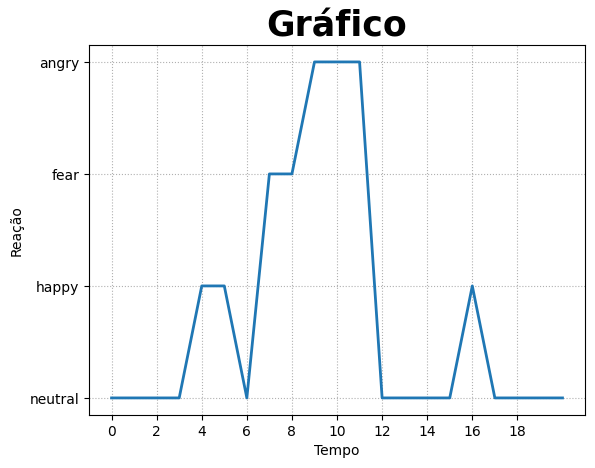

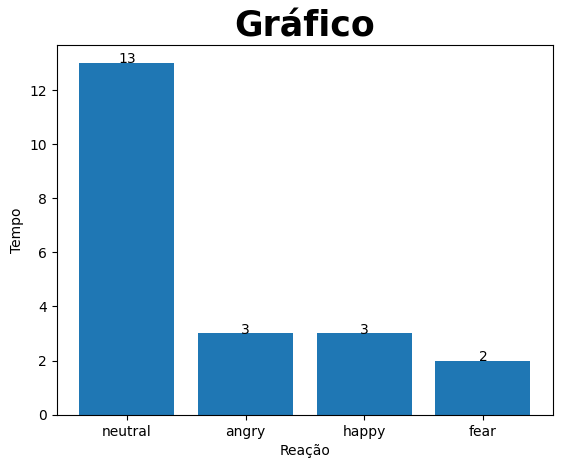

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltline
from openpyxl import load_workbook
import openpyxl
import os
import numpy

path = 'C:/Users/natha/OneDrive - Associacao Antonio Vieira/# UNISINOS/TCC2/Code/src/Results'

reactions = [
    ('neutral', 0),
    ('happy', 3.322744000000057),
    ('neutral', 5.560093500000221),
    ('fear', 6.676402500000222),
    ('angry', 8.942872200000238),
    ('neutral', 11.220656400000735),
    ('happy', 15.75596780000069),
    ('neutral', 16.86338640000031),
    ('neutral', 19.146108200000526)]

reactions_step = [
    ('neutral', 0),
    ('neutral', 1),
    ('neutral', 2),
    ('neutral', 3),
    ('happy', 4),
    ('happy', 5),
    ('neutral', 6),
    ('fear', 7),
    ('fear', 8),
    ('angry', 9),
    ('angry', 10),
    ('angry', 11),
    ('neutral', 12),
    ('neutral', 13),
    ('neutral', 14),
    ('neutral', 15),
    ('happy', 16),
    ('neutral', 17),
    ('neutral', 18),
    ('neutral', 19),
    ('neutral', 20)]

sorted_frequency_list = [('neutral', 13), ('angry', 3), ('happy', 3), ('fear', 2)]

df1 = pd.DataFrame(reactions_step)
df2 = pd.DataFrame(sorted_frequency_list)

x1 = df1[1]
y1 = df1[0]

fig1 = pltline.figure()
ax = fig1.gca()
pltline.plot(x, y, linewidth=2, markersize=1)
pltline.title("Gráfico", fontsize=25, fontweight='bold')
pltline.ylabel('Reação')
pltline.xlabel('Tempo')
ax.set_xticks(numpy.arange(0, reactions_step[-1][1], 2))
pltline.grid(linestyle=':')
pltline.show()

x2 = df2[0]
y2 = df2[1]

fig2 = pltline.figure()
ax = fig2.gca()
pltline.bar(x2, y2)
pltline.title("Gráfico", fontsize=25, fontweight='bold')
pltline.xlabel('Reação')
pltline.ylabel('Tempo')
for i in range(len(x2)):
    plt.text(i, y2[i], y2[i], ha='center')
pltline.show()

# img = pltline.savefig(f"{path}/GraficoLinha.png")